
## Goal

Your goal in this assigment is to implement a Gaussian Bayes Classifier.

There are two different flavours of Bayes Rule

- Naive Bayes
- **Gaussian Bayes**


### Instructions
- Do not modify the block with test cases.
- Do not tailor your solution to only pass the test cases. We will use different data for grading so keep your solution generic.
- Passing all the cases means you are in reight direction, but does not ensure 100% marks, there may be some other cases hidden, so carefully read the question statement and implement all the necessory functionality.
- <p style="color:#ff0000">Plagiarism of any kind, (including internet) will lead to zero marks.</p>

#### Libraries
Ther are two additional libraries used which are not included in Anaconda package, nose and seaborn. You can install them using the following commands :
```sh
conda install -c anaconda nose=1.3.7
conda install -c anaconda seaborn=0.7.1
```
Version of different libraries used are listed below:
- Matplotlib **1.5.1**
- Pandas **0.18.1**
- Numpy **1.11.1**
- Scipy **0.17.1**
- Seaborn **0.7.1**

Code for checking version info is present in cell below.

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.

**Note : ** Accuracies may slightly vary due to randomness in train-text split. 

In [3]:
%pylab inline
import scipy.stats
import pandas as pd
from collections import defaultdict
import seaborn as sns
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t


plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
print ("Matplotlib version : ", matplotlib.__version__)
print ("Pandas version : ", pd.__version__)
print ("Numpy version : ", np.__version__)
print ("Scipy version : ", scipy.__version__)
print ("Seaborn version : ", sns.__version__)

Matplotlib version :  3.7.1
Pandas version :  1.5.3
Numpy version :  1.24.3
Scipy version :  1.10.1
Seaborn version :  0.12.2


In [12]:
# YOUR CODE HERE

class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        self.classes = None
        self.nclasses = 3
        self.means = {}      
        self.covariances = {}
        self.priors = {}  
        
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        self.classes = np.unique(Y)
        self.nclasses = len(self.classes)

        # Calculate the prior probabilities for each class
        self.priors = {
            'Iris-setosa': np.sum(Y == "Iris-setosa") / len(Y),
            'Iris-versicolor': np.sum(Y == "Iris-versicolor") / len(Y),
            'Iris-virginica': np.sum(Y == "Iris-virginica") / len(Y)
        }

        # Initialize lists to collect data for each class
        setosa_data = []
        versicolor_data = []
        virginica_data = []

        for i in range(len(Y)):
            if Y[i] == "Iris-setosa":
                setosa_data.append(X[i])
            elif Y[i] == "Iris-versicolor":
                versicolor_data.append(X[i])
            elif Y[i] == "Iris-virginica":
                virginica_data.append(X[i])

        # Convert lists to numpy arrays
        setosa_data = np.array(setosa_data)
        versicolor_data = np.array(versicolor_data)
        virginica_data = np.array(virginica_data)

        # Calculate and store the means for each class
        self.means = {
            'Iris-setosa': np.mean(setosa_data, axis=0),
            'Iris-versicolor': np.mean(versicolor_data, axis=0),
            'Iris-virginica': np.mean(virginica_data, axis=0)
        }

        # Calculate and store the variances for each class
        self.covariances = {
            'Iris-setosa': np.cov(setosa_data.T),
            'Iris-versicolor': np.cov(versicolor_data.T),
            'Iris-virginica': np.cov(virginica_data.T)
        }
        
        print(self.covar)
        
    def multivariate_gaussian_pdf(self, x, mean, cov):
        """
        Calculate the multivariate Gaussian PDF.
        
        Parameters:
        x: numpy array, the data point (1D array of features).
        mean: numpy array, the mean vector of the distribution.
        cov: numpy array, the covariance matrix of the distribution.
        
        Returns:
        Probability density of the data point `x`.
        """
        d = len(x)
        eps = 1e-6  # For numerical stability
        cov += np.eye(d) * eps  # Ensure positive definiteness
        
        term1 = np.exp(-0.5 * np.dot(np.dot((x - mean).T, inv(cov)), (x - mean)))
        term2 = np.sqrt((2 * np.pi) ** d * det(cov))
        
        return term1 / term2

    def test(self, X):
        """
        Predict the class for each sample in the input data X using the multivariate Gaussian PDF.
        
        Parameters:
        X: numpy array of shape (m, n), where m is the number of samples and n is the number of features.
        
        Returns:
        Predicted class labels for each sample in X.
        """
        nexamples, nfeatures = X.shape
        res = np.zeros((nexamples, self.nclasses))
        pclasses = [0] * nexamples
        
        # Calculate probabilities for each class
        for i in range(nexamples):
            probs = []
            for cls in self.classes:
                prior = np.log(self.priors[cls]) # disctionary with classes of flower
                likelihood = np.log(self.multivariate_gaussian_pdf(X[i], self.means[cls], self.covariances[cls]))
                
                #print("likelihood: ",likelihood)
                
                posterior = prior+likelihood
                #print("posterior: ",posterior)
                
                probs.append(posterior)
                
            # Normalize probabilities
            
            #print(f"probs: {probs}")
            
            
            res[i] = probs
            pclasses[i] = self.classes[np.argmax(probs)]

        return np.array(pclasses), res

    def predict(self, X_test):
        return self.test(X)[0]

In [11]:
# import numpy as np
# from numpy.linalg import inv, det
# from scipy.stats import multivariate_normal

# class GaussianBayes:
#     def __init__(self):
#         self.means = {}
#         self.nclasses = 3
#         self.covariances = {}
#         self.priors = {}
#         self.classes = None

#     def train(self, X, Y):
#         """
#         Train the Bayes classifier using the multivariate Gaussian distribution.
        
#         Parameters:
#         X: numpy array of shape (m, n), training data with m samples and n features.
#         Y: numpy array of shape (m,), training labels corresponding to the data.
#         """
#         self.classes = np.unique(Y)
#         total_samples = len(Y)

#         for cls in self.classes:
#             X_class = X[Y == cls]
#             self.means[cls] = np.mean(X_class, axis=0)  # Mean vector for the class
#             self.covariances[cls] = np.cov(X_class, rowvar=False)  # Covariance matrix for the class
#             self.priors[cls] = X_class.shape[0] / total_samples  # Prior probability for the class
            
#         #print(self.covariances)

#     def multivariate_gaussian_pdf(self, x, mean, cov):
#         """
#         Calculate the multivariate Gaussian PDF.
        
#         Parameters:
#         x: numpy array, the data point (1D array of features).
#         mean: numpy array, the mean vector of the distribution.
#         cov: numpy array, the covariance matrix of the distribution.
        
#         Returns:
#         Probability density of the data point `x`.
#         """
#         d = len(x)
#         eps = 1e-6  # For numerical stability
#         cov += np.eye(d) * eps  # Ensure positive definiteness
        
#         term1 = np.exp(-0.5 * np.dot(np.dot((x - mean).T, inv(cov)), (x - mean)))
#         term2 = np.sqrt((2 * np.pi) ** d * det(cov))
        
#         return term1 / term2

#     def test(self, X):
#         """
#         Predict the class for each sample in the input data X using the multivariate Gaussian PDF.
        
#         Parameters:
#         X: numpy array of shape (m, n), where m is the number of samples and n is the number of features.
        
#         Returns:
#         Predicted class labels for each sample in X.
#         """
#         nexamples, nfeatures = X.shape
#         res = np.zeros((nexamples, self.nclasses))
#         pclasses = [0] * nexamples
        
#         # Calculate probabilities for each class
#         for i in range(nexamples):
#             probs = []
#             for cls in self.classes:
#                 prior = np.log(self.priors[cls]) # disctionary with classes of flower
#                 likelihood = np.log(self.multivariate_gaussian_pdf(X[i], self.means[cls], self.covariances[cls]))
                
#                 #print("likelihood: ",likelihood)
                
#                 posterior = prior+likelihood
#                 #print("posterior: ",posterior)
                
#                 probs.append(posterior)
                
#             # Normalize probabilities
            
#             #print(f"probs: {probs}")
            
            
#             res[i] = probs
#             pclasses[i] = self.classes[np.argmax(probs)]

#         return np.array(pclasses), res

#     def predict(self, X_test):
#         return self.test(X)[0]

In [12]:
# {'Iris-setosa': array([[0.03287879, 0.00621212],
#        [0.00621212, 0.01394831]]), 'Iris-versicolor': array([[0.21440336, 0.0705042 ],
#        [0.0705042 , 0.04210084]]), 'Iris-virginica': array([[0.30769748, 0.05593277],
#        [0.05593277, 0.0747563 ]])}

In [5]:
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#### Lets Visualize the data

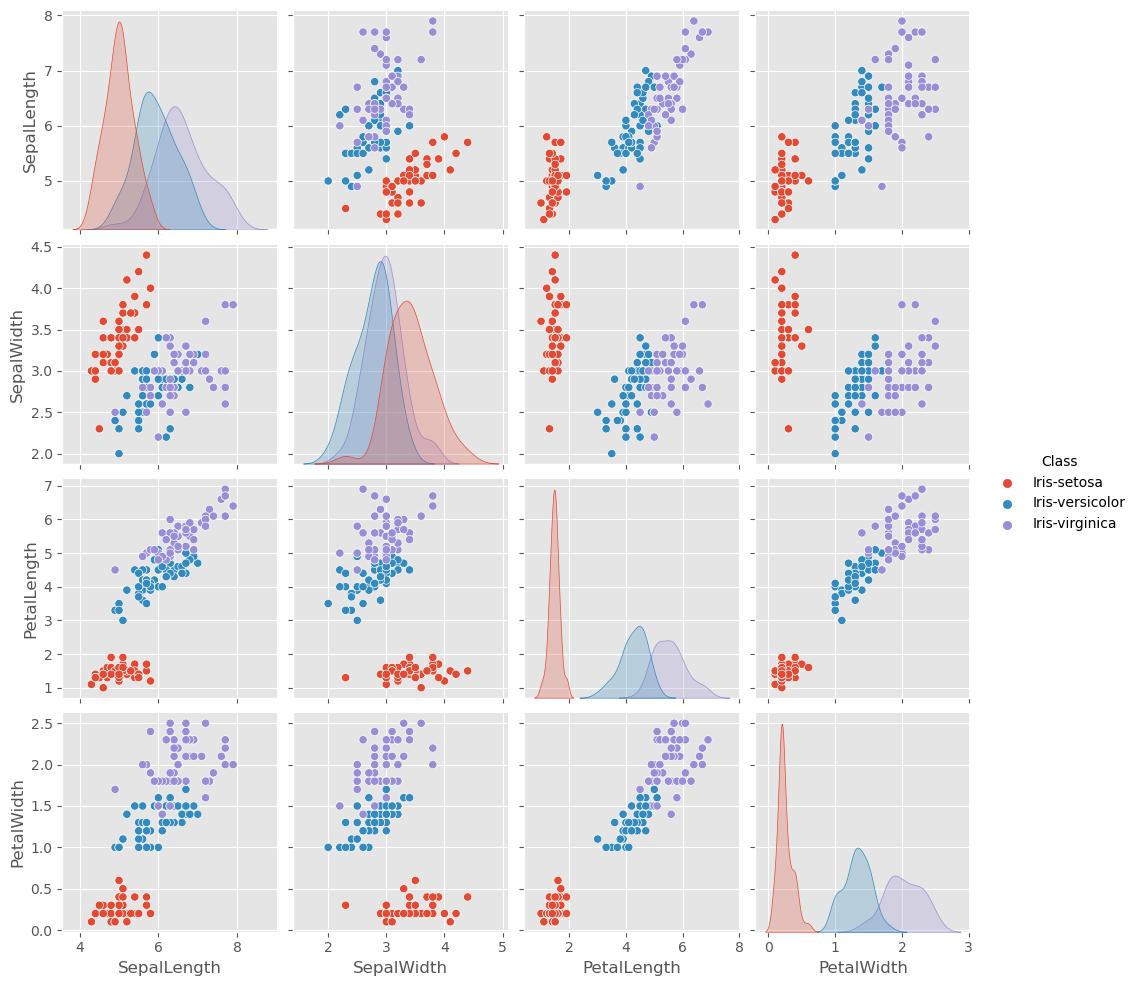

In [6]:
sns.pairplot(data, hue="Class")

#### Get your data in matrix

In [8]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


#### Let's Plot the Data

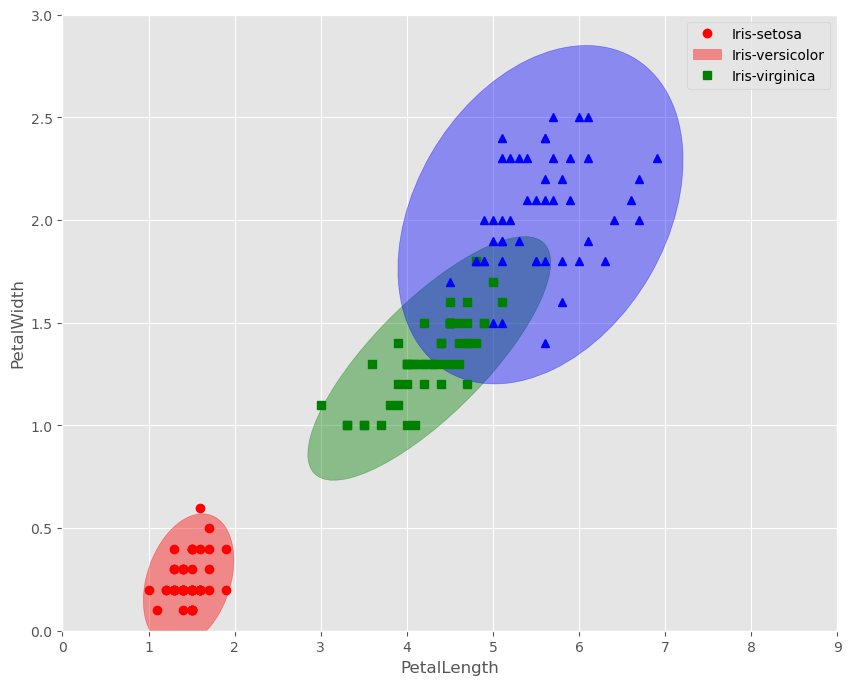

In [9]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4])

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...

In [10]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...

Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape) 
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


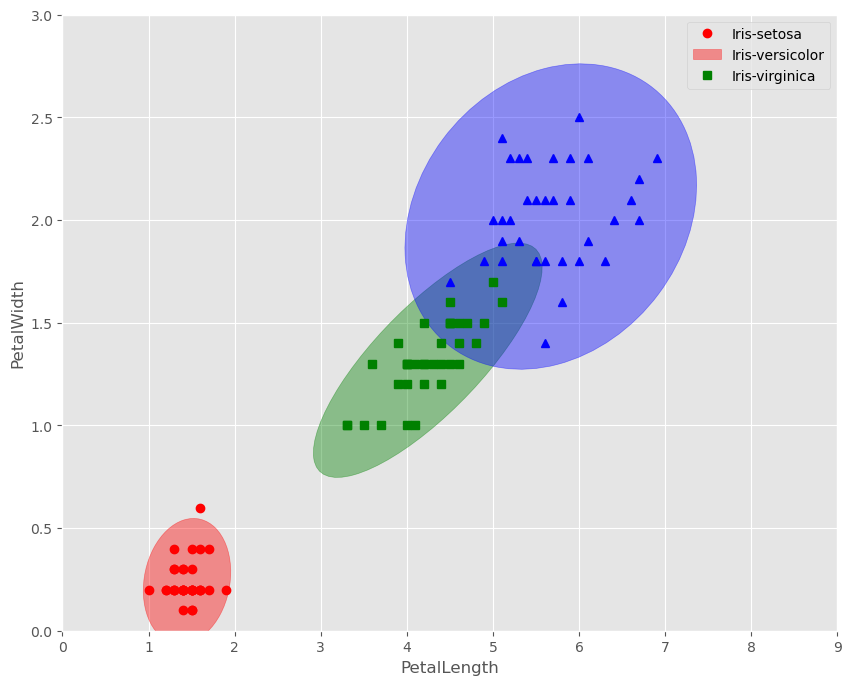

In [19]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

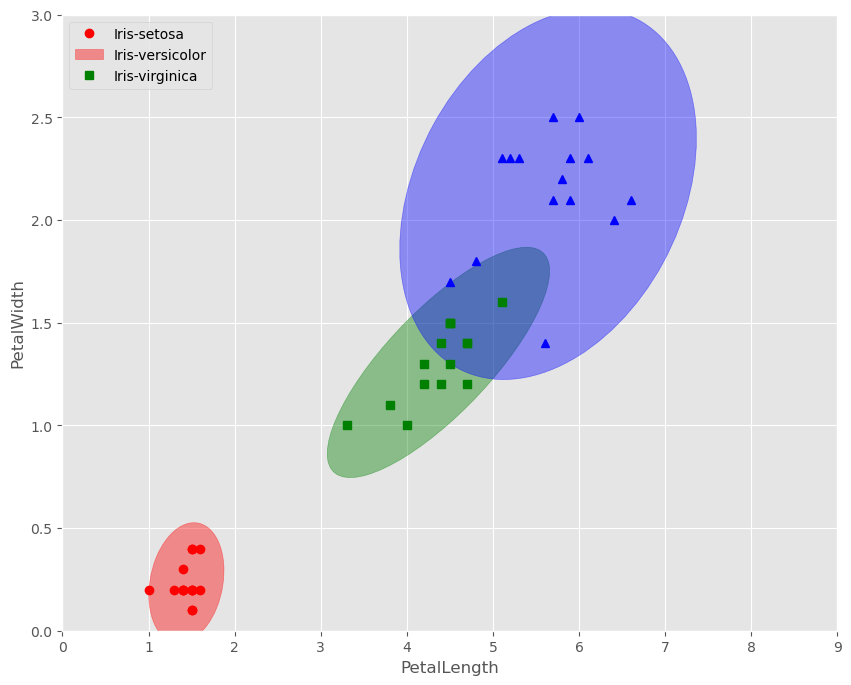

In [11]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

In [15]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

{'Iris-setosa': array([[0.03750446, 0.00816399],
       [0.00816399, 0.01158645]]), 'Iris-versicolor': array([[0.19986555, 0.06829412],
       [0.06829412, 0.03752941]]), 'Iris-virginica': array([[0.25904202, 0.03542017],
       [0.03542017, 0.07361345]])}


In [16]:
#Lets test it on the set of unseen examples...
pclasses,res=gb.test(Xtest[:,2:])

Lets see how good we are doing...
==================

In [23]:
#Lets see how good we are doing...
print (pclasses==Ytest)
print (Ytest.shape[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True False  True]
45


In [24]:
# Using Just two attributes, accuracy is 

print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

42
Accuracy =  0.9333333333333333


In [57]:
# print (" Plotting the Decision Surface of Training Set... ")
# t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

### Test cases for your classifier

In [58]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X[:,2:],Y)
pclasses_val, _ = gb_val.test(X_val[:,2:])
acc_val = np.sum(pclasses_val == Y_val) / float(pclasses_val.shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2]).reshape((1,2)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

{'Iris-setosa': array([[0.03064626, 0.0057568 ],
       [0.0057568 , 0.01169218]]), 'Iris-versicolor': array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]]), 'Iris-virginica': array([[0.30458776, 0.04882449],
       [0.04882449, 0.07543265]])}
All cases passed !


## Question: What can you conclude from the above decision Region

# K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [17]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, acc))
    totacc.append(acc)

print (totacc, 'Mean Accuracy =', np.mean(totacc))

Generating CV data for 3 classes
{'Iris-setosa': array([[0.03614114, 0.00598348],
       [0.00598348, 0.00963964]]), 'Iris-versicolor': array([[0.23846373, 0.07614509],
       [0.07614509, 0.0402845 ]]), 'Iris-virginica': array([[0.24042674, 0.04354196],
       [0.04354196, 0.08674964]])}
[Info] Fold 1 Accuracy = 1.0
{'Iris-setosa': array([[0.03081081, 0.00641892],
       [0.00641892, 0.01144144]]), 'Iris-versicolor': array([[0.22319346, 0.07657895],
       [0.07657895, 0.04299431]]), 'Iris-virginica': array([[0.3459175 , 0.04240398],
       [0.04240398, 0.06253912]])}
[Info] Fold 2 Accuracy = 0.9444444444444444
{'Iris-setosa': array([[0.02174174, 0.00570571],
       [0.00570571, 0.01363363]]), 'Iris-versicolor': array([[0.21107397, 0.06446657],
       [0.06446657, 0.03445235]]), 'Iris-virginica': array([[0.31709815, 0.05051209],
       [0.05051209, 0.06671408]])}
[Info] Fold 3 Accuracy = 1.0
{'Iris-setosa': array([[0.0351952 , 0.00647147],
       [0.00647147, 0.01352853]]), 'Iris-vers


Hmm Quite Impressive...
--------------------------------

In [ ]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

In [ ]:
pclasses,res=gb.test(Xtest)

#### Do you expect your Test accuracy to increase or decrease ?

In [ ]:
# Using all four attributes, accuracy is 
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

### Test cases for all four attributes

In [ ]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X,Y)
pclasses_val, _ = gb_val.test(X_val)
acc_val = np.sum(pclasses_val == Y_val) / float(pclasses_val.shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2,2,2]).reshape((1,4)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

What can you conclude ?
====================

## Let's change the features... 

In [ ]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Remember Features are the important !!
======================

In [ ]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

## Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand

In [61]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

class GaussianBayes(BaseEstimator, ClassifierMixin):
    ''' Implements the Gaussian Bayes For Classification... '''
    
    def __init__(self):
        self.means = {}
        self.variances = {}
        self.priors = {}
        self.nclasses = 0

    def fit(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        
        self.classes = np.unique(Y)
        self.nclasses = len(self.classes)

        # Calculate the prior probabilities for each class
        self.priors = {
            'Iris-setosa': np.sum(Y == "Iris-setosa") / len(Y),
            'Iris-versicolor': np.sum(Y == "Iris-versicolor") / len(Y),
            'Iris-virginica': np.sum(Y == "Iris-virginica") / len(Y)
        }

        # Initialize lists to collect data for each class
        setosa_data = []
        versicolor_data = []
        virginica_data = []

        for i in range(len(Y)):
            if Y[i] == "Iris-setosa":
                setosa_data.append(X[i])
            elif Y[i] == "Iris-versicolor":
                versicolor_data.append(X[i])
            elif Y[i] == "Iris-virginica":
                virginica_data.append(X[i])

        # Convert lists to numpy arrays
        setosa_data = np.array(setosa_data)
        versicolor_data = np.array(versicolor_data)
        virginica_data = np.array(virginica_data)

        # Calculate and store the means for each class
        self.means = {
            'Iris-setosa': np.mean(setosa_data, axis=0),
            'Iris-versicolor': np.mean(versicolor_data, axis=0),
            'Iris-virginica': np.mean(virginica_data, axis=0)
        }

        # Calculate and store the variances for each class
        self.variances = {
            'Iris-setosa': np.var(setosa_data, axis=0),
            'Iris-versicolor': np.var(versicolor_data, axis=0),
            'Iris-virginica': np.var(virginica_data, axis=0)
        }

        # Print the results to verify
        #print(self.means)
        #print(self.variances)
        #print(self.priors)


    def predict(self, X):
        ''' Run the trained classifiers on the given set of examples '''
        pclasses, _ = self.test(X)
        return pclasses

    def test(self, X):
        ''' Run the trained classifiers on the given set of examples 
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probability: probability of each example falling in that predicted class...
        '''
        
        nexamples, nfeatures = X.shape
        res = np.zeros((nexamples, self.nclasses))
        pclasses = [0] * nexamples
        
        for i in range(nexamples):
            probs = []
            for cls in self.classes:
                prior = self.priors[cls]
                likelihood = self.calculate_likelihood(X[i], cls)
                posterior = prior * likelihood
                probs.append(posterior)
                
            total_prob = sum(probs)
            normalized_probs = [p / total_prob for p in probs]
            
            res[i] = normalized_probs
            pclasses[i] = self.classes[np.argmax(normalized_probs)]
        
        return np.array(pclasses), res
    
    def calculate_likelihood(self, x, cls):
        mean = self.means[cls]
        variance = self.variances[cls]
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        likelihood = (1 / np.sqrt(2 * np.pi * variance)) * exponent
        return np.prod(likelihood)

def find_best_feature_pair(X, Y):
    feature_indices = range(X.shape[1]) #(0,1,2,3)
    print(feature_indices)
    best_pair = None
    best_accuracy = 0
    
    # Generate all pairs of features
    for i in feature_indices:
        for j in feature_indices:
            if i >= j:  # Avoid duplicate pairs and same feature
                continue
            
            X_pair = X[:, [i, j]]  #select all row from column i and j
            #print(f"X_pair: {X_pair}")
            
            gb_model = GaussianBayes()
            
            # Perform cross-validation directly on X_pair and Y
            scores = cross_val_score(gb_model, X_pair, Y, cv=5)  # 5-fold CV
            mean_accuracy = np.mean(scores)
            
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_pair = (i, j)

    return best_pair, best_accuracy

data = pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X = np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y = np.asarray(data['Class'].dropna())

best_features, max_accuracy = find_best_feature_pair(X, Y)
print(f"Best feature pair: {best_features}, Maximum Mean Cross-Validation Accuracy: {max_accuracy:.4f}")

range(0, 4)
Best feature pair: (2, 3), Maximum Mean Cross-Validation Accuracy: 0.9600
